In [1]:
# Customer Analysis and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince
import mglearn

# Machine Learning
## Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix

## ML Models Diffrent Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from yellowbrick.model_selection import FeatureImportances

In [2]:
# Reading dataset
df = pd.read_csv('telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [3]:
#first five rows in a dataset
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
#last five rows in a dataset
df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [5]:
# shape of dataset
df.shape

(3333, 11)

In [6]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
# Descriptive statistics of a dataset
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

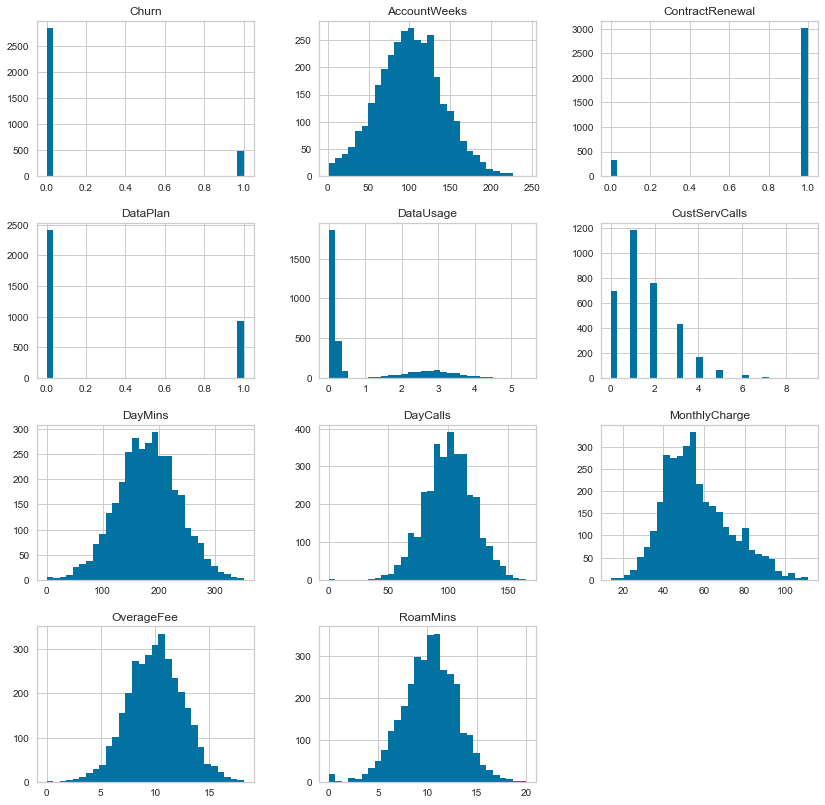

In [8]:
#Univariate Analysis of input variables
df.hist(figsize=(14,14), bins=30)

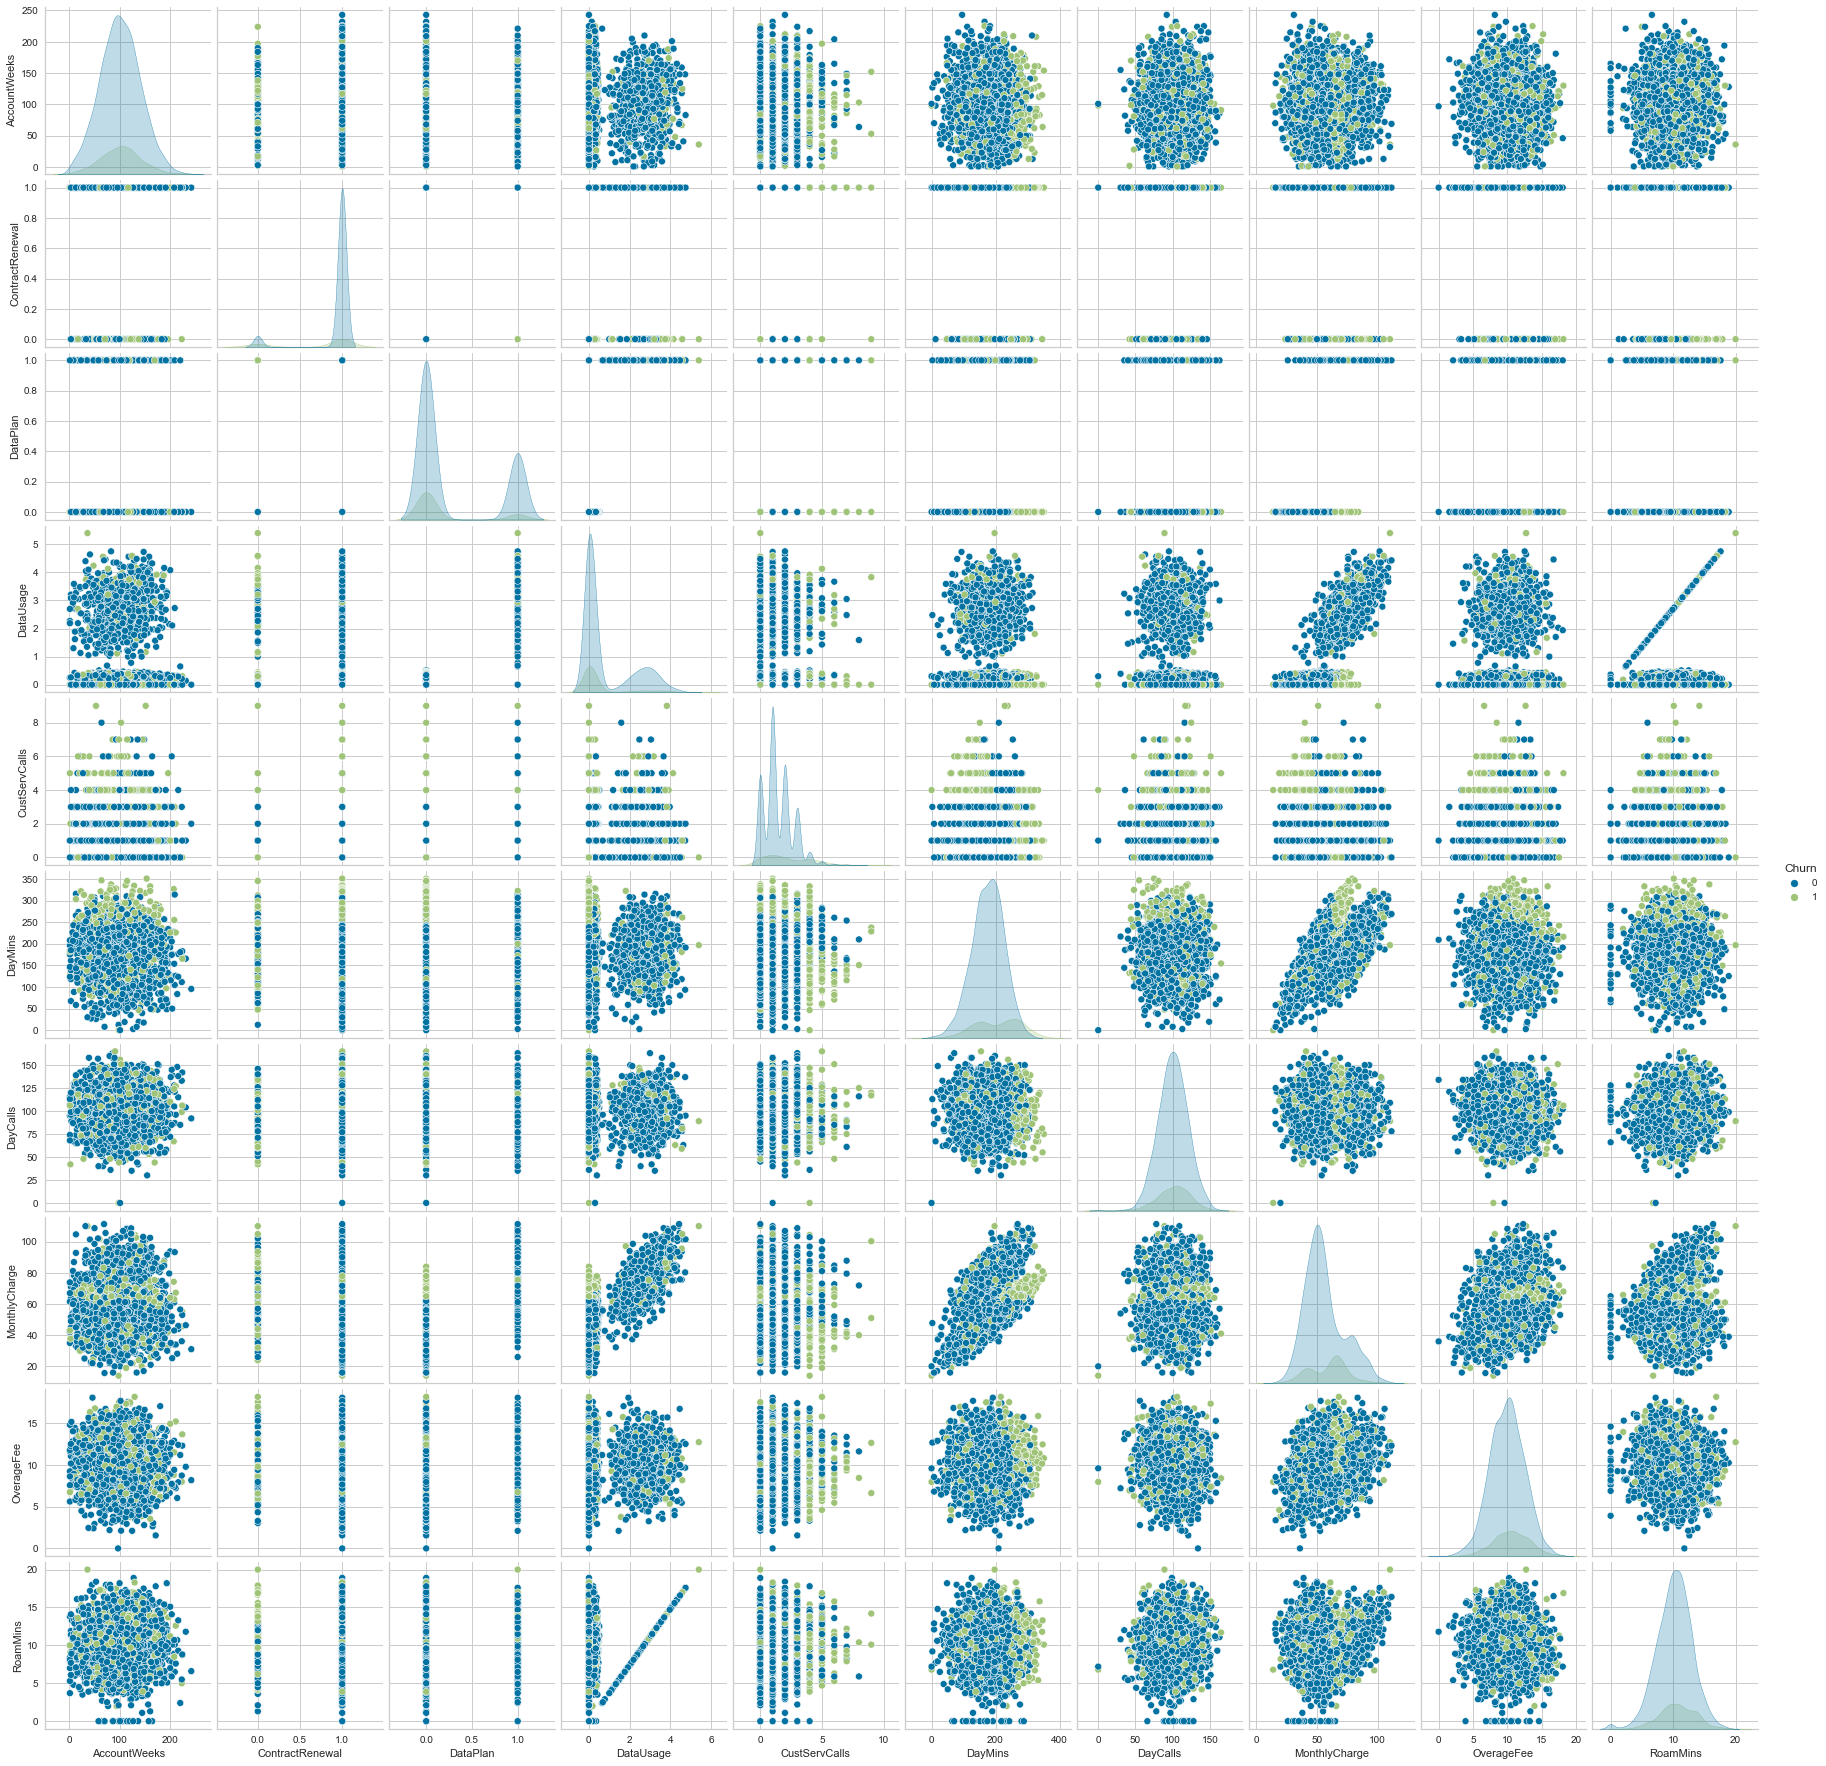

In [9]:
# Pair plot
sns.pairplot(df, hue="Churn")

<AxesSubplot:title={'center':'Churned Ratio'}, ylabel='Churn'>

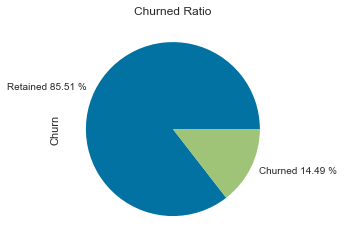

In [10]:
# Pie churn to show the churn proportion in overall data
df["Churn"].value_counts().plot(kind="pie", title="Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df.loc[df.Churn==0])*100/len(df.Churn)),
                                          "Churned {:.2f} %".format(len(df.loc[df.Churn==1])*100/len(df.Churn))],
                                figsize=(4,4))

<AxesSubplot:xlabel='Churn', ylabel='count'>

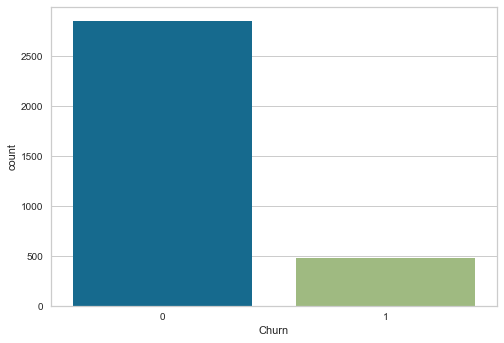

In [11]:
# to show churn class distribution
sns.countplot(x = 'Churn',  data=df)

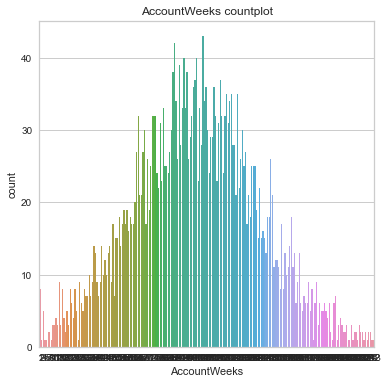

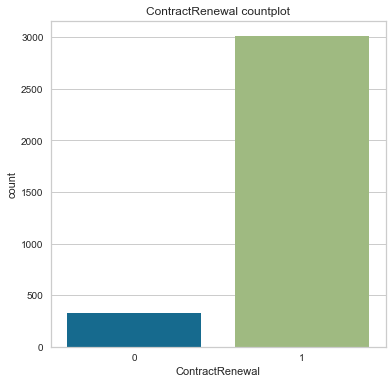

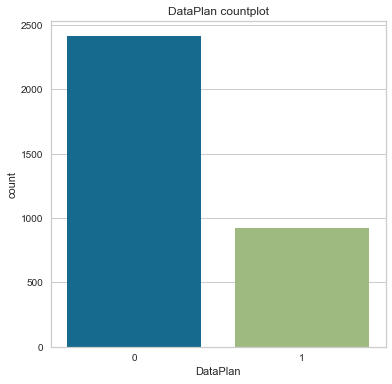

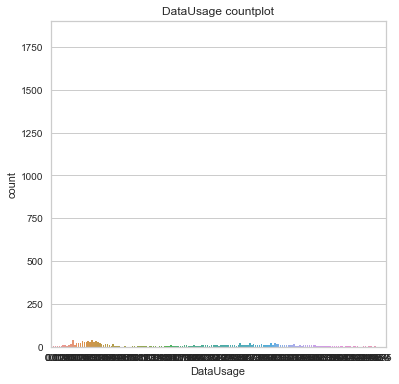

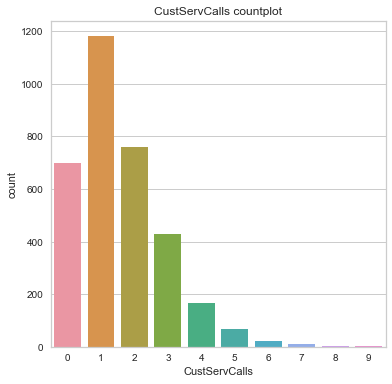

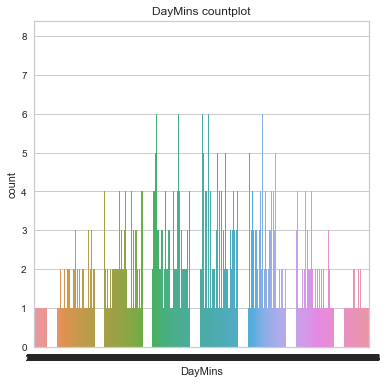

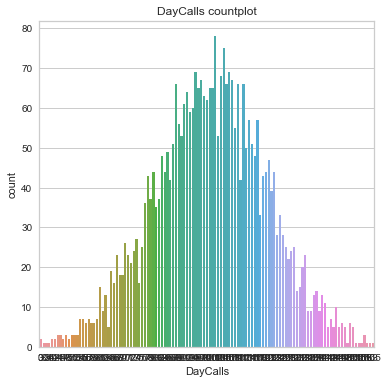

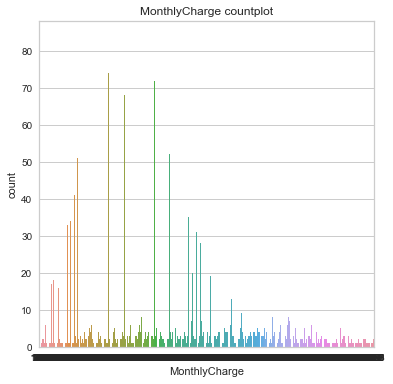

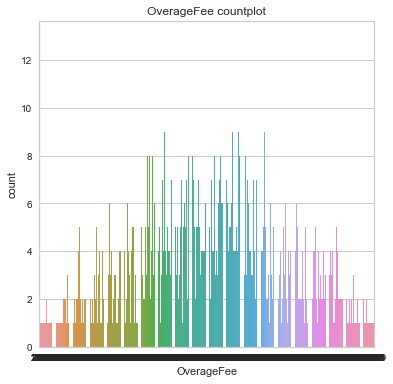

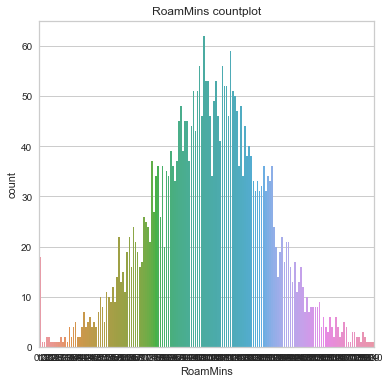

In [12]:
# countplot of input variables
for col in df.columns[1:]:
    plt.figure(figsize = (6,6))
    plt.title(f"{col} countplot")
    sns.countplot(data=df, x= col)

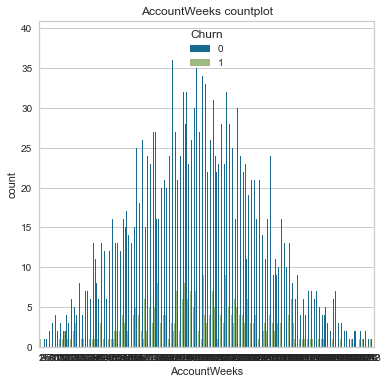

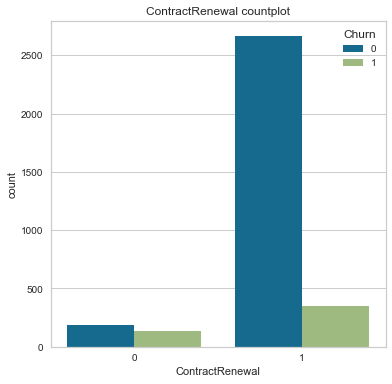

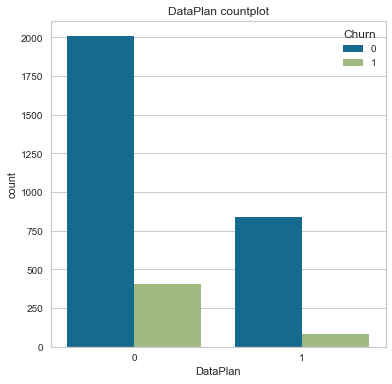

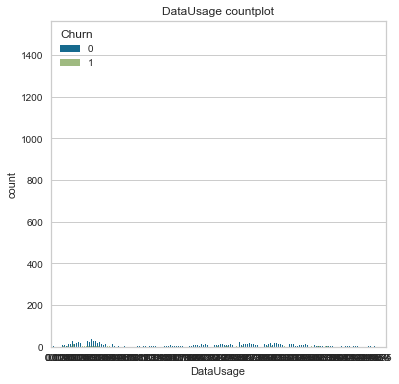

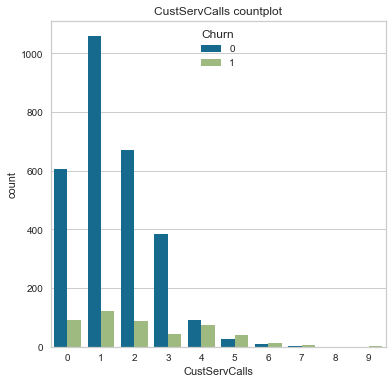

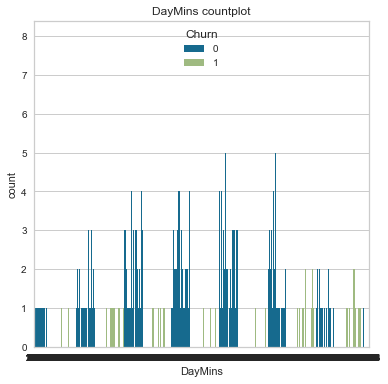

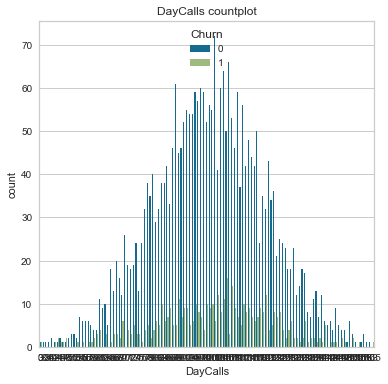

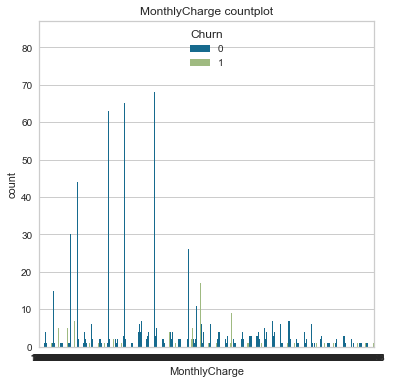

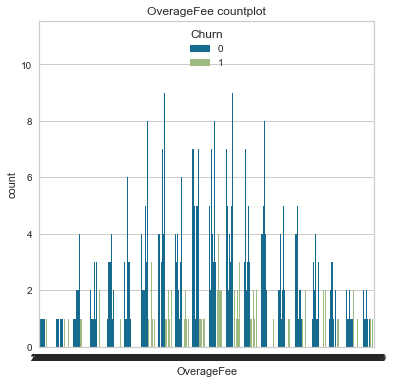

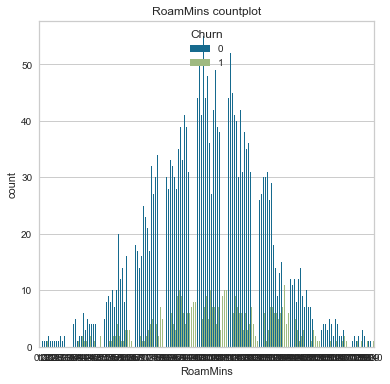

In [13]:
# countplot of input variables with respect to target variable, Churn
for col in df.columns[1:]:
    plt.figure(figsize = (6,6))
    plt.title(f"{col} countplot")
    sns.countplot(data=df, x= col,hue='Churn')

In [17]:
# Count of people whose data usage is zero and who dont have data plan
data_nousage = len(df[df["DataUsage"]==0])
data_noplan = len(df[df["DataPlan"]==0])
print(str(data_nousage) + " numbers of people have 0 data usage.")
print(str(data_noplan) + " numbers of people have 0 data plan.")

1813 numbers of people have 0 data usage.
2411 numbers of people have 0 data plan.


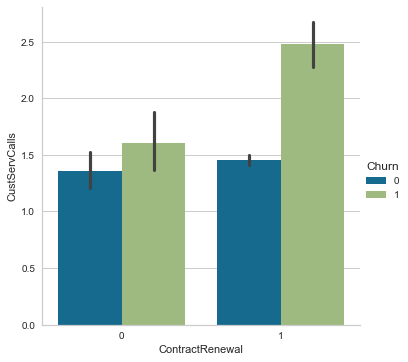

In [18]:
#to find the relationship between contract reneweal and custservcalls with respect to churn
sns.catplot(x="ContractRenewal", y="CustServCalls",hue="Churn", kind="bar", data=df)

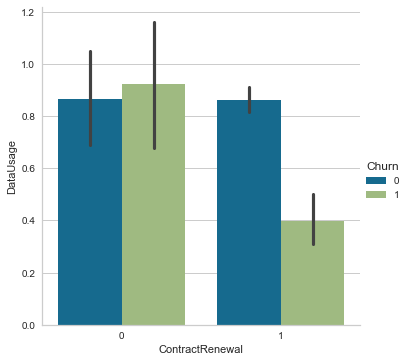

In [19]:
#to find the relationship between contract reneweal and datausage with respect to churn
sns.catplot(x="ContractRenewal", y="DataUsage", hue="Churn",kind = 'bar' , data=df)

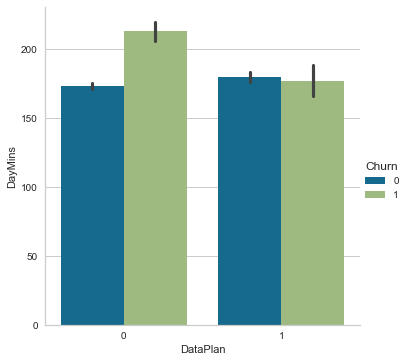

In [20]:
#to find the relationship between dataplan and daymins with respect to churn
sns.catplot(x="DataPlan", y="DayMins",kind = 'bar', hue="Churn", data=df)

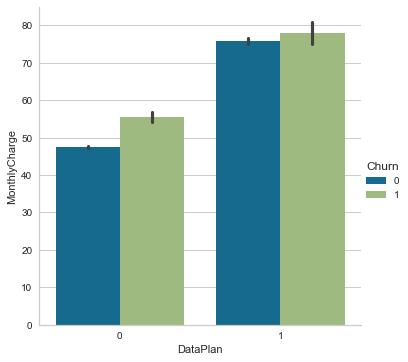

In [21]:
#to find the relationship between dataplan and Monthly charge with respect to churn
sns.catplot(x="DataPlan", y="MonthlyCharge",kind = 'bar', hue="Churn", data=df)

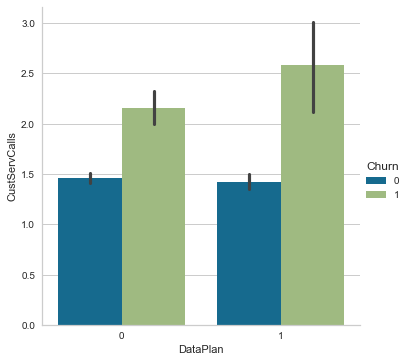

In [22]:
#to find the relationship between data plan and custservcalls with respect to churn
sns.catplot(x="DataPlan", y="CustServCalls",hue="Churn", kind="bar", data=df)

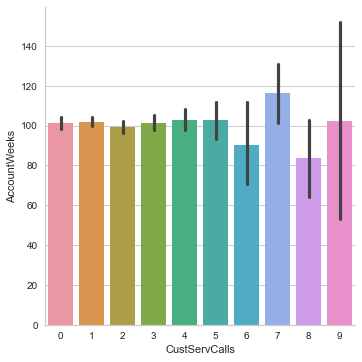

In [23]:
#to find the relationship between customerservcalls and Accountweeks with respect to churn
sns.catplot(x="CustServCalls", y="AccountWeeks", kind="bar", data=df)

<AxesSubplot:>

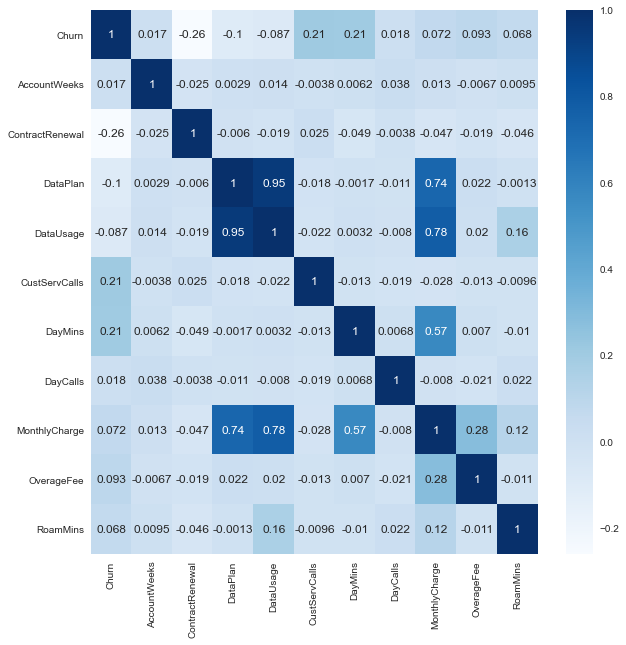

In [24]:
#heatmap to find the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [25]:
# function to create boxplots
def boxplots (df, variables, n_rows=None, n_cols=None, hue="Churn"):
    
    fig=plt.figure(figsize=(12,8))
    sns.set(palette='pastel')
    for i, var in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(y=var, x=hue, hue=hue, data=df, ax=ax).set_title(var)
    plt.show()

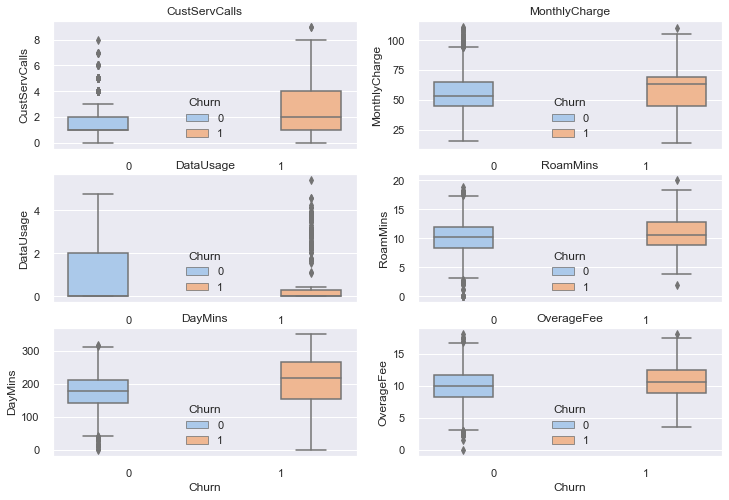

In [26]:
# plotting boxplots for checking for outliers
continue_variables = df[["CustServCalls", "MonthlyCharge", "DataUsage", "RoamMins", "DayMins", "OverageFee"]]
boxplots(df, continue_variables, 3, 2)

In [27]:
# Removing outliers using InterQuartile Range Method
# make a copy of the dataframe
churn_data = df.copy()

# print the shape of the df
display(churn_data.shape)

features = churn_data.drop("Churn", axis=1)

churn_data = features.copy()

for cn, s in churn_data.iteritems():
    # create quartiles for every column
    quartiles = np.quantile(churn_data[cn][churn_data[cn].notnull()], [.25, .75])

    # look at 4 times the quartiles
    power_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(cn, f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')

    # show the absolute difference between the median of the column and the 4xquartile
    outliers = churn_data.loc[np.abs(churn_data[cn] - churn_data[cn].median()) > power_4iqr, cn]
    outliers
    display(f'Dropping rows would remove: {len(outliers.index)} rows from the dataframe')

    # drop indexes
    display("Dropping indexed outliers...")
    churn_data.drop(index= outliers.index, axis='index', inplace=True)

(3333, 11)

AccountWeeks Q1 = 74.0, Q3 = 127.0, 4*IQR = 212.0


'Dropping rows would remove: 0 rows from the dataframe'

'Dropping indexed outliers...'

ContractRenewal Q1 = 1.0, Q3 = 1.0, 4*IQR = 0.0


'Dropping rows would remove: 323 rows from the dataframe'

'Dropping indexed outliers...'

DataPlan Q1 = 0.0, Q3 = 1.0, 4*IQR = 4.0


'Dropping rows would remove: 0 rows from the dataframe'

'Dropping indexed outliers...'

DataUsage Q1 = 0.0, Q3 = 1.76, 4*IQR = 7.04


'Dropping rows would remove: 0 rows from the dataframe'

'Dropping indexed outliers...'

CustServCalls Q1 = 1.0, Q3 = 2.0, 4*IQR = 4.0


'Dropping rows would remove: 34 rows from the dataframe'

'Dropping indexed outliers...'

DayMins Q1 = 143.4, Q3 = 215.5, 4*IQR = 288.4


'Dropping rows would remove: 0 rows from the dataframe'

'Dropping indexed outliers...'

DayCalls Q1 = 88.0, Q3 = 114.0, 4*IQR = 104.0


'Dropping rows would remove: 0 rows from the dataframe'

'Dropping indexed outliers...'

MonthlyCharge Q1 = 45.0, Q3 = 66.0, 4*IQR = 84.0


'Dropping rows would remove: 0 rows from the dataframe'

'Dropping indexed outliers...'

OverageFee Q1 = 8.3, Q3 = 11.7625, 4*IQR = 13.849999999999994


'Dropping rows would remove: 0 rows from the dataframe'

'Dropping indexed outliers...'

RoamMins Q1 = 8.4, Q3 = 12.1, 4*IQR = 14.799999999999997


'Dropping rows would remove: 0 rows from the dataframe'

'Dropping indexed outliers...'

In [28]:
# shape of data frame post removing outliers
churn_data.shape

(2976, 10)

In [29]:
# merge the churn_data Churn column back into the df with dropped rows on the index
processed_df = churn_data.join(df["Churn"], how='left')
processed_df

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0
6,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5,0
8,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7,0
...,...,...,...,...,...,...,...,...,...,...,...
3327,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8,0
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,0
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0


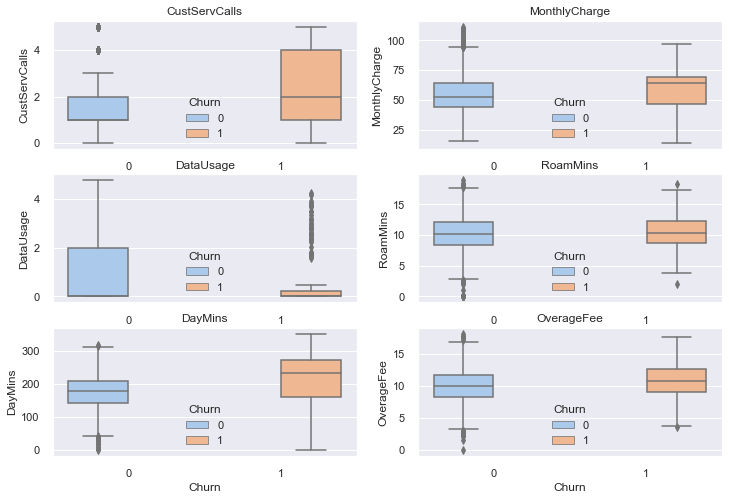

In [30]:
# boxplot post rremoving outliers
continue_variables = processed_df[["CustServCalls", "MonthlyCharge", "DataUsage", "RoamMins", "DayMins", "OverageFee"]]

boxplots(processed_df, continue_variables, 3, 2)

In [31]:
# check churn count
processed_df["Churn"].value_counts()

0    2651
1     325
Name: Churn, dtype: int64

In [32]:
processed_df.shape

(2976, 11)

In [33]:
# Storing input and output attributes in variables X and Y
X = processed_df.drop("Churn", axis=1)
y = processed_df["Churn"]

In [34]:
y.value_counts()

0    2651
1     325
Name: Churn, dtype: int64

In [35]:
# Partitioning the data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.96666052,  0.        , -0.60193714, ...,  0.39117068,
         1.11676909,  0.45927031],
       [ 0.64378854,  0.        , -0.60193714, ..., -0.63250489,
         0.41528072,  1.69819217],
       [ 0.74313376,  0.        , -0.60193714, ..., -0.53944348,
         2.59462379, -1.27522029],
       ...,
       [-1.4672975 ,  0.        , -0.60193714, ..., -0.91168914,
        -0.71577075, -0.42567387],
       [-0.20064588,  0.        , -0.60193714, ..., -1.03577103,
         0.40739883,  0.24688371],
       [-0.697372  ,  0.        , -0.60193714, ..., -0.2912797 ,
         0.93942652,  0.70705468]])

In [37]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.71843238,  0.        , -0.64785325, ..., -0.61070649,
        -1.02608433, -0.14196719],
       [ 1.09330766,  0.        , -0.64785325, ..., -0.89932404,
         0.45708903,  0.00333562],
       [ 0.48088849,  0.        ,  1.54355944, ...,  0.74218827,
        -0.55434725,  0.51189544],
       ...,
       [ 0.2512313 ,  0.        , -0.64785325, ..., -0.05752286,
        -0.7742247 , -0.86848122],
       [ 0.35330117,  0.        ,  1.54355944, ...,  1.91469706,
         1.17668796,  0.43924404],
       [-0.05497828,  0.        ,  1.54355944, ...,  1.67418244,
         0.39312468,  0.98412957]])

In [38]:
# function to evaluate the model

def modelling(classifiers, X_train, y_train, X_test, y_test):
    random_probs = [0 for i in range(len(y_test))]
    plt.figure(figsize=(12, 8))
    for i, clf in enumerate(classifiers):
        model = clf#.__class__.__name__
        name = clf
        model.fit(X_train, y_train)
        pred_y=model.predict(X_test)
        
        p = model.predict_proba(X_test)
            
        score = accuracy_score(y_test, pred_y)
        fpr, tpr, threshholds=roc_curve(y_test, pred_y)
        auc_score=auc(fpr, tpr)
        cross_val = cross_val_score(model, X_test, y_test)
        report = classification_report(y_test, pred_y)
        auc_score1 = roc_auc_score(y_test, p[:,1])
        
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        # roc curve for tpr = fpr 
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        #plt.figure(figsize=(15, 10))
        plt.plot(fpr, tpr, linestyle='--', label=f'{clf}(AUROC = %0.3f)' %auc_score1)
        plt.plot(p_fpr, p_tpr, linestyle='--')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')

        print(f'\n{model}\n{report}.\nModel accuracy: {score}.\nauc={auc_score}\nCross-valdation score: {cross_val.mean()}')

In [39]:
# list of classifers implemented
clf_list = [
   
    DecisionTreeClassifier(random_state=1, max_depth = 8)
    , RandomForestClassifier(random_state=1, max_depth=8)
    , GradientBoostingClassifier(random_state=1)
    , KNeighborsClassifier()
 ]



DecisionTreeClassifier(max_depth=8, random_state=1)
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       796
           1       0.83      0.64      0.72        97

    accuracy                           0.95       893
   macro avg       0.89      0.81      0.85       893
weighted avg       0.94      0.95      0.94       893
.
Model accuracy: 0.9462486002239642.
auc=0.8114217997202507
Cross-valdation score: 0.9227355470466387

RandomForestClassifier(max_depth=8, random_state=1)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       796
           1       0.83      0.57      0.67        97

    accuracy                           0.94       893
   macro avg       0.89      0.78      0.82       893
weighted avg       0.94      0.94      0.94       893
.
Model accuracy: 0.9406494960806271.
auc=0.7765956069004818
Cross-valdation score: 0.9552256606616032

GradientBoostingClassifier(random_s

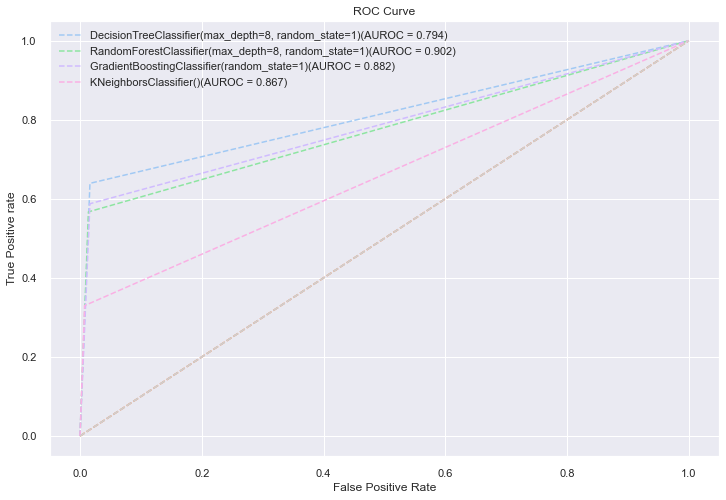

In [40]:
# evaluating the classifiers on imbalanced data
modelling(
    clf_list
    , X_train=X_train
    , X_test=X_test
    , y_train=y_train
    , y_test=y_test
)

In [41]:
# function to predict feature importance
def feature_importance(classifiers):
    for i, clf in enumerate(classifiers):
        model = clf
        viz = FeatureImportances(model)
        viz.fit(X, y)
        viz.show()

In [42]:
# list of classifiers used for finding feature importance
classifier_list = [
   
    DecisionTreeClassifier(random_state=1, max_depth = 8)
    , RandomForestClassifier(random_state=1, max_depth=8)
    , GradientBoostingClassifier(random_state=1)

 ]


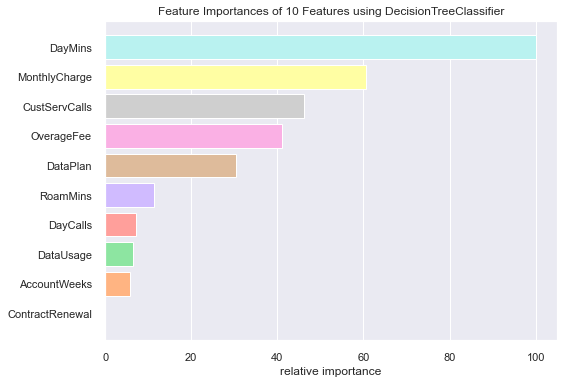

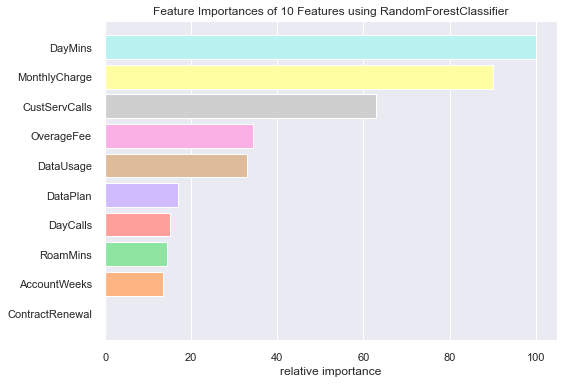

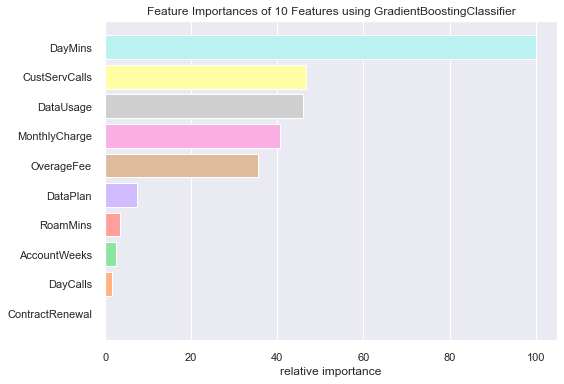

In [43]:
# checking the feature importance
feature_importance(classifier_list)

In [44]:
processed_df['Churn'].value_counts()

0    2651
1     325
Name: Churn, dtype: int64

In [45]:
# Random under-sampling
df2 = processed_df.loc[processed_df['Churn']==0].sample(n=490).copy()
# All Churned Customers
df3 = processed_df.loc[processed_df['Churn']==1].copy()

# Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle rows randomly
df4 = df4.sample(frac=1)

# Reset index of every rws
df4.reset_index(drop=True, inplace=True)
df4

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,80,1,0,0.00,2,268.7,120,72.0,15.05,5.8,1
1,45,1,0,0.00,1,78.6,106,30.0,9.37,7.4,1
2,122,1,1,2.27,3,195.4,83,79.7,13.41,8.4,0
3,54,1,1,3.05,2,112.0,90,67.5,10.40,11.3,0
4,144,1,0,0.00,1,278.5,95,68.0,12.04,11.6,1
...,...,...,...,...,...,...,...,...,...,...,...
810,136,1,0,0.00,0,102.1,75,37.0,10.98,9.8,0
811,87,1,0,0.00,2,322.5,106,73.0,10.23,9.4,1
812,194,1,0,0.00,0,193.3,106,48.0,8.45,11.8,0
813,176,1,0,0.32,1,201.9,101,51.2,7.74,9.0,0


<AxesSubplot:title={'center':'Churned Ratio'}, ylabel='Churn'>

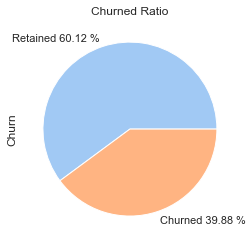

In [46]:
df4["Churn"].value_counts().plot(kind="pie", title="Churned Ratio",
                                labels = ["Retained {:.2f} %".format(len(df4.loc[df4.Churn==0])*100/len(df4.Churn)),
                                          "Churned {:.2f} %".format(len(df4.loc[df4.Churn==1])*100/len(df4.Churn))],
                                figsize=(4,4))

In [47]:
# Now we select only Customer with a new Dataframe(df_churn), who left the company. 
mask = df4.loc[:,'Churn'] == 1
df_churn = df4.loc[mask,:]
df_churn.head(10)


,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,80,1,0,0.0,2,268.7,120,72.0,15.05,5.8,1
1,45,1,0,0.0,1,78.6,106,30.0,9.37,7.4,1
4,144,1,0,0.0,1,278.5,95,68.0,12.04,11.6,1
5,127,1,0,0.0,0,245.2,91,61.0,10.86,13.9,1
11,179,1,0,0.0,0,287.3,123,74.0,14.40,10.5,1
12,52,1,0,0.0,4,155.0,110,38.0,6.67,7.0,1
15,98,1,0,0.0,1,165.0,129,46.0,10.13,12.5,1
16,119,1,0,0.0,2,81.9,75,36.0,12.69,8.9,1
19,91,1,0,0.0,1,153.0,123,38.0,7.06,10.3,1
20,113,1,0,0.0,1,272.1,111,70.0,13.43,8.5,1


In [48]:
print('Number of churned customers:',len(df_churn))

Number of churned customers: 325


In [49]:
df4.shape

(815, 11)

In [50]:
# undersampled data
dependent = df4.drop("Churn", axis=1)
target = df4["Churn"]

In [51]:
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(dependent, target, test_size=0.30, random_state=42)

In [52]:
scaler = StandardScaler()
X_us_train = scaler.fit_transform(X_us_train)
X_us_train

array([[-1.07363232,  0.        , -0.55167728, ..., -0.73441315,
        -0.02979334,  0.79036446],
       [-1.17178709,  0.        ,  1.81265393, ...,  1.38121836,
        -0.6801594 , -0.24197999],
       [ 1.87101064,  0.        , -0.55167728, ..., -0.47392999,
        -1.10481018, -1.56927998],
       ...,
       [-1.44171269,  0.        , -0.55167728, ...,  0.75860008,
        -1.0780304 , -1.12684665],
       [-1.31901923,  0.        , -0.55167728, ...,  0.19316103,
         0.26478422, -0.53693554],
       [ 1.33115943,  0.        , -0.55167728, ..., -0.47392999,
         0.11175692, -0.68441332]])

In [53]:
X_us_test = scaler.fit_transform(X_us_test)
X_us_test

array([[-0.77576034,  0.        , -0.57577925, ..., -0.12626144,
         0.30047896,  0.04519511],
       [-0.34931516,  0.        , -0.57577925, ..., -1.03877038,
         0.1640795 ,  0.04519511],
       [ 0.15708848,  0.        ,  1.73677674, ...,  0.65849625,
        -0.73956691, -0.20977072],
       ...,
       [-0.40262081,  0.        , -0.57577925, ..., -0.55209895,
        -0.969741  , -0.24619441],
       [-1.60199786,  0.        , -0.57577925, ...,  0.84708143,
         0.54770298, -1.59387092],
       [ 0.8767147 ,  0.        ,  1.73677674, ...,  1.9907593 ,
         0.85460176,  0.99221104]])


DecisionTreeClassifier(max_depth=8, random_state=1)
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       152
           1       0.94      0.80      0.86        93

    accuracy                           0.90       245
   macro avg       0.91      0.88      0.89       245
weighted avg       0.90      0.90      0.90       245
.
Model accuracy: 0.9020408163265307.
auc=0.8814020939445387
Cross-valdation score: 0.8693877551020408

RandomForestClassifier(max_depth=8, random_state=1)
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       152
           1       0.97      0.83      0.90        93

    accuracy                           0.93       245
   macro avg       0.94      0.91      0.92       245
weighted avg       0.93      0.93      0.93       245
.
Model accuracy: 0.926530612244898.
auc=0.9073995472552349
Cross-valdation score: 0.9061224489795918

GradientBoostingClassifier(random_st

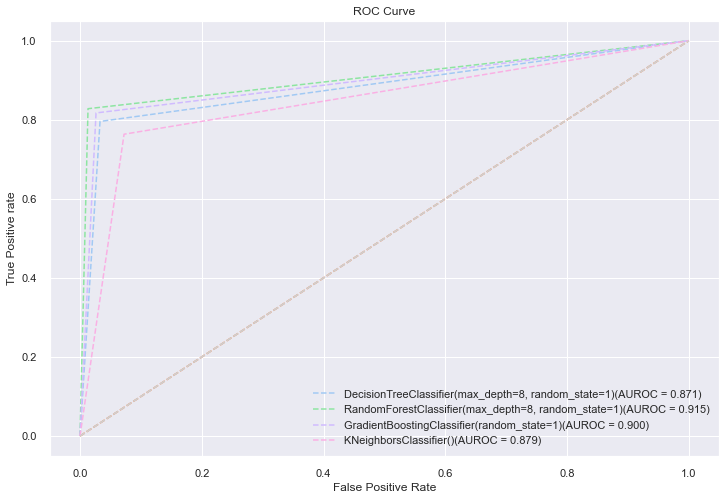

In [54]:
modelling(
    clf_list
    , X_train=X_us_train
    , X_test=X_us_test
    , y_train=y_us_train
    , y_test=y_us_test
)

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
y_train.value_counts()

0    1855
1     228
Name: Churn, dtype: int64

In [57]:
# Over sampling using SMOTE
sm=SMOTE(
    sampling_strategy='auto'
    , random_state=1
)

In [58]:
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

In [59]:
y_sm_train.value_counts()

0    1855
1    1855
Name: Churn, dtype: int64


DecisionTreeClassifier(max_depth=8, random_state=1)
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       796
           1       0.36      0.72      0.48        97

    accuracy                           0.83       893
   macro avg       0.66      0.78      0.69       893
weighted avg       0.90      0.83      0.85       893
.
Model accuracy: 0.8275475923852184.
auc=0.7810508729213076
Cross-valdation score: 0.9227355470466387

RandomForestClassifier(max_depth=8, random_state=1)
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       796
           1       0.68      0.81      0.74        97

    accuracy                           0.94       893
   macro avg       0.83      0.88      0.85       893
weighted avg       0.94      0.94      0.94       893
.
Model accuracy: 0.9372900335946248.
auc=0.8833471481116925
Cross-valdation score: 0.9552256606616032

GradientBoostingClassifier(random_s

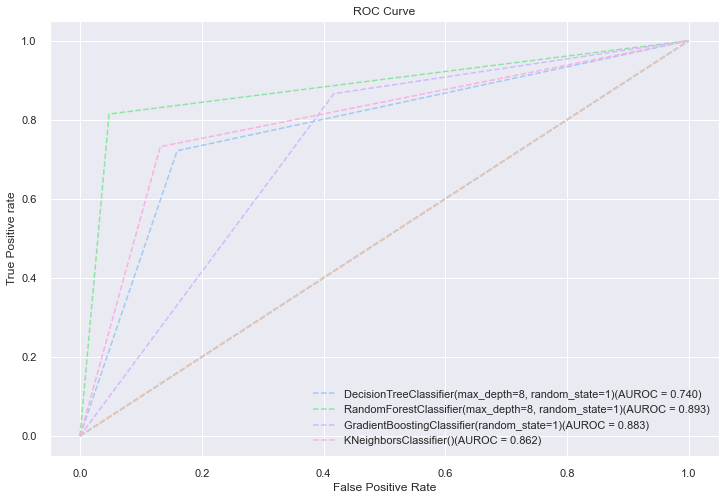

In [60]:
modelling(
    clf_list
    , X_train=X_sm_train
    , y_train=y_sm_train
    , X_test=X_test
    , y_test=y_test
)